This Notebook presents a baseline model that works with both numerical and categorical data features

Next models must make use of categorical features and outperform baseline

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
train = pd.read_csv("./dataset/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
train.shape

(1460, 81)

# Missing Values

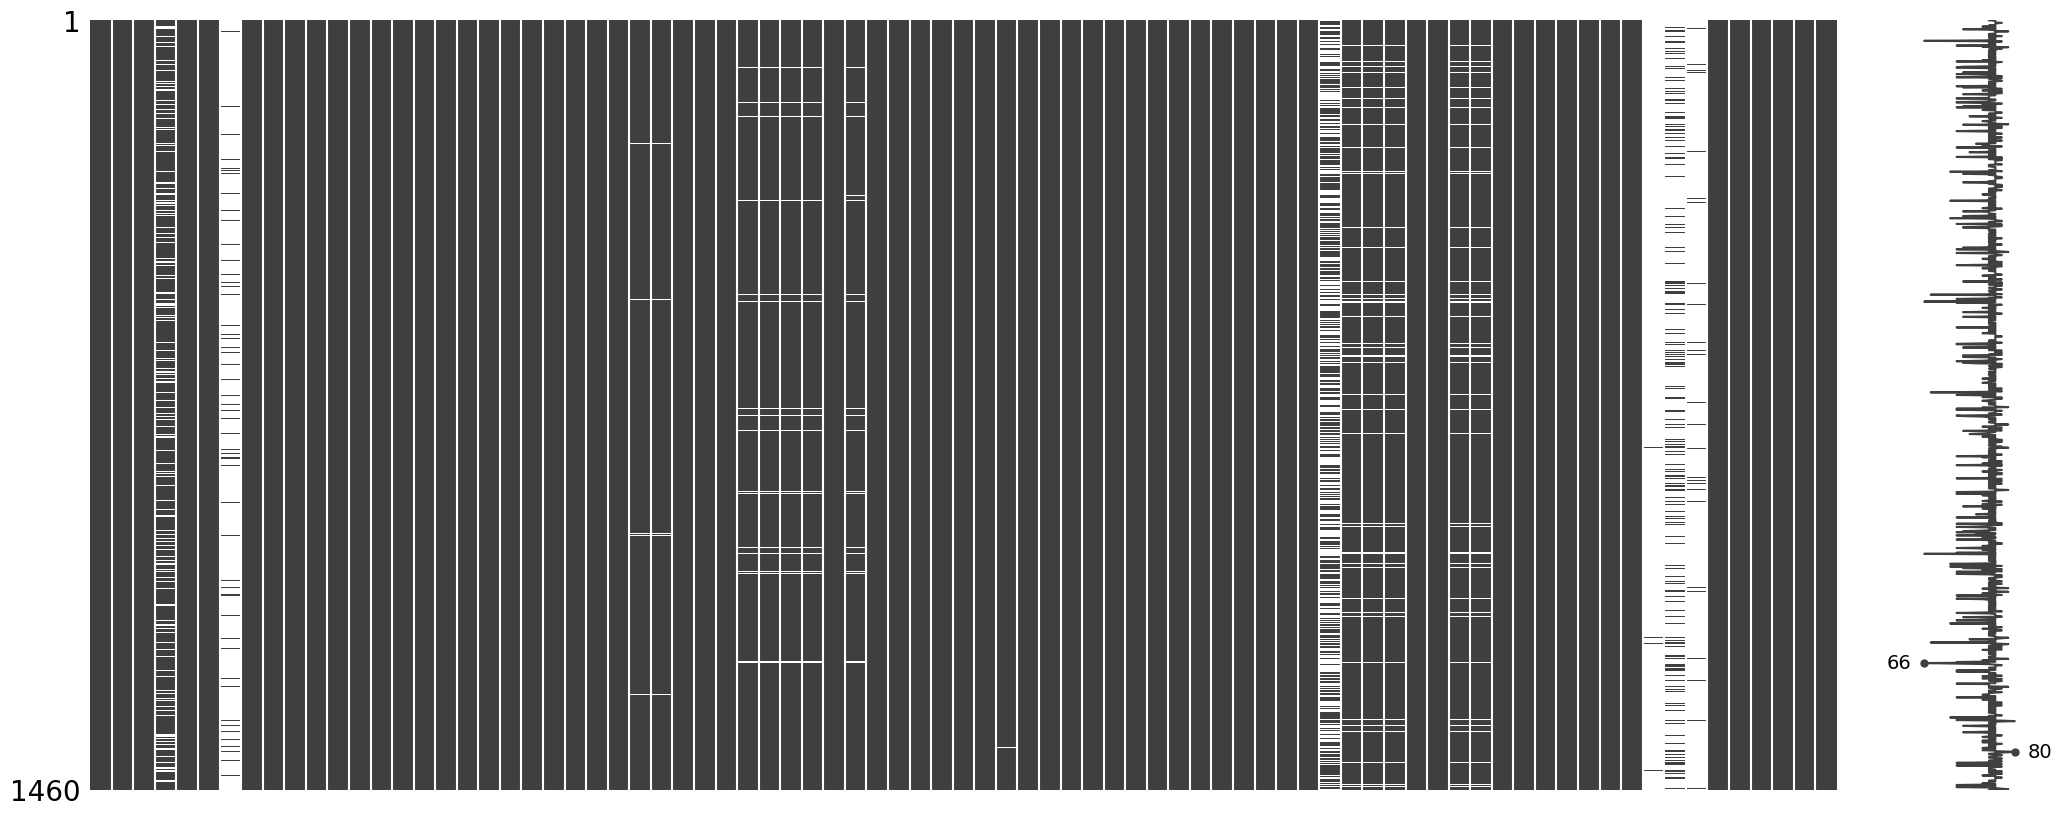

In [64]:
import missingno as msno

msno.matrix(train);

## Features that have more than 15% missing values must be dropped!

In [65]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    # Get Missing Velues per feature (exclude features that are complete)
    feature_missing = df.isnull().sum().sort_values(ascending = False)
    feature_missing = feature_missing[feature_missing > 0]
    percent = round(feature_missing/len(df)*100, 2)
    return pd.concat([feature_missing, percent], axis=1, keys=['Total','Percent'])

missing_percentage(train)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


In [66]:
train.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "LotFrontage"], axis=1, inplace=True)
missing_percentage(train)

,Total,Percent
GarageType,81,5.55
GarageCond,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
BsmtFinType2,38,2.60
BsmtExposure,38,2.60
BsmtFinType1,37,2.53
BsmtCond,37,2.53
BsmtQual,37,2.53


In [67]:
train.fillna(train.mode().iloc[0], inplace = True)  # There is a trick to convert .mode() to DataFrame
missing_percentage(train)

,Total,Percent


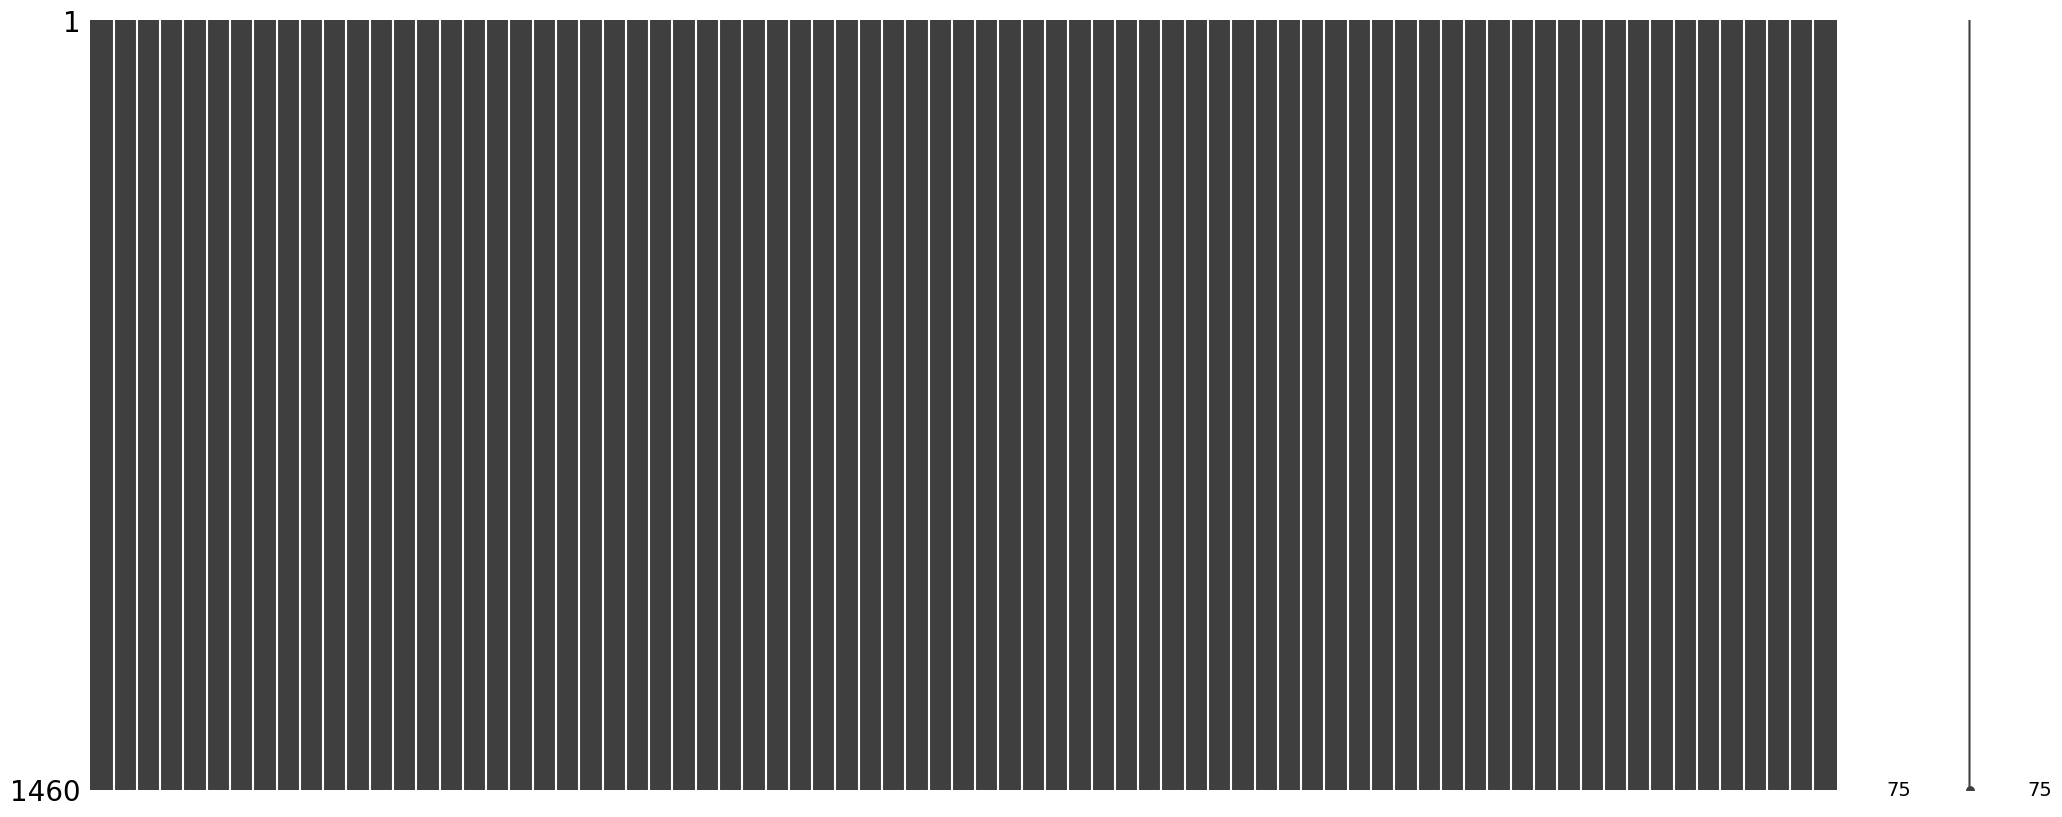

In [68]:
msno.matrix(train);

# Encoding Categorical Features

PS: There are several numerical features who are actually categorical!

In [69]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

In [70]:
train_categorical = train.select_dtypes(include="object")
train_numerical = train.select_dtypes(exclude="object")

In [71]:
train_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,Attchd,RFn,TA,TA,Y,2,2008,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Typ,Attchd,RFn,TA,TA,Y,5,2007,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Typ,Attchd,RFn,TA,TA,Y,9,2008,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Typ,Detchd,Unf,TA,TA,Y,2,2006,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Typ,Attchd,RFn,TA,TA,Y,12,2008,WD,Normal


In [72]:
train_numerical.isna().sum().sum(), train_categorical.isna().sum().sum()

(0, 0)

## If feature has more than 10-15 categories - one-hot-encoding is not a good case

In [73]:
unique_values = sorted({feature: len(train_categorical[feature].unique()) for feature in train_categorical.columns}.items(), key=lambda x:x[1])
unique_values
# plt.hist(unique_values)

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('GarageFinish', 3),
 ('PavedDrive', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('MasVnrType', 4),
 ('ExterQual', 4),
 ('BsmtQual', 4),
 ('BsmtCond', 4),
 ('BsmtExposure', 4),
 ('KitchenQual', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Electrical', 5),
 ('GarageQual', 5),
 ('GarageCond', 5),
 ('YrSold', 5),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('BsmtFinType1', 6),
 ('BsmtFinType2', 6),
 ('Heating', 6),
 ('GarageType', 6),
 ('SaleCondition', 6),
 ('Functional', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('RoofMatl', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('MoSold', 12),
 ('MSSubClass', 15),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

Only 3 features have more than 10 categories. I will drop them and encode all the rest

In [74]:
train_categorical.drop(["Exterior2nd", "Exterior1st", "Neighborhood"], axis=1, inplace=True)

In [75]:
encoded_categories = pd.get_dummies(train_categorical)
encoded_categories.head()

,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [76]:
train_numerical.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,8450,7,5,2003,2003,196.0,706,0,150,...,2,548,0,61,0,0,0,0,0,208500
1,2,9600,6,8,1976,1976,0.0,978,0,284,...,2,460,298,0,0,0,0,0,0,181500
2,3,11250,7,5,2001,2002,162.0,486,0,434,...,2,608,0,42,0,0,0,0,0,223500
3,4,9550,7,5,1915,1970,0.0,216,0,540,...,3,642,0,35,272,0,0,0,0,140000
4,5,14260,8,5,2000,2000,350.0,655,0,490,...,3,836,192,84,0,0,0,0,0,250000


In [77]:
train_numerical.shape, encoded_categories.shape

((1460, 34), (1460, 210))

In [78]:
train = pd.concat([train_numerical, encoded_categories], axis=1)
train.shape

(1460, 244)

In [79]:
train.head()

,Id,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0


# Data Separation

In [80]:
Y = train["SalePrice"]
X = train.drop(["SalePrice"], axis=1)

# Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = pd.DataFrame(scaler.transform(X))

In [82]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,233,234,235,236,237,238,239,240,241,242
0,-1.730865,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-1.728492,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,-1.726120,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,-1.723747,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,...,-0.058621,-0.301962,-0.045376,0.390293,3.668167,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995
4,-1.721374,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,...,-0.058621,-0.301962,-0.045376,0.390293,-0.272616,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [83]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [84]:
X.shape, Y.shape

((1460, 243), (1460,))

# Modeling

In [88]:
from keras.layers import Dense, Input
from keras.models import Sequential

model = Sequential()
model.add(Input(shape = (X.shape[1],), batch_size=16))
model.add(Dense(10, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (16, 10)                  2440      
                                                                 
 dense_23 (Dense)            (16, 20)                  220       
                                                                 
 dense_24 (Dense)            (16, 50)                  1050      
                                                                 
 dense_25 (Dense)            (16, 100)                 5100      
                                                                 
 dense_26 (Dense)            (16, 50)                  5050      
                                                                 
 dense_27 (Dense)            (16, 20)                  1020      
                                                                 
 dense_28 (Dense)            (16, 10)                 

In [89]:
model.compile(loss='mean_absolute_error', optimizer="adam")
history = model.fit(x=X, y=Y, batch_size=16, epochs=100, validation_split=0.2)

Epoch 1/100
73/73 [==============================] - 1s 6ms/step - loss: 180584.7031 - val_loss: 180227.7188
Epoch 2/100
73/73 [==============================] - 0s 3ms/step - loss: 171883.5312 - val_loss: 130543.7969
Epoch 3/100
73/73 [==============================] - 0s 3ms/step - loss: 55625.5234 - val_loss: 47946.4453
Epoch 4/100
73/73 [==============================] - 0s 3ms/step - loss: 33908.7344 - val_loss: 41198.1250
Epoch 5/100
73/73 [==============================] - 0s 3ms/step - loss: 29795.4082 - val_loss: 37532.7930
Epoch 6/100
73/73 [==============================] - 0s 3ms/step - loss: 26751.5898 - val_loss: 35496.1797
Epoch 7/100
73/73 [==============================] - 0s 3ms/step - loss: 24578.2344 - val_loss: 33674.4453
Epoch 8/100
73/73 [==============================] - 0s 3ms/step - loss: 23061.7754 - val_loss: 32131.2773
Epoch 9/100
73/73 [==============================] - 0s 3ms/step - loss: 21981.6172 - val_loss: 30805.0957
Epoch 10/100
73/73 [=============

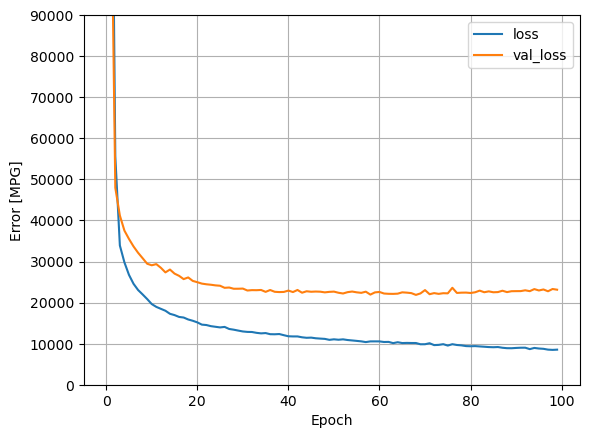

In [90]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 90000])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

Categorical Baseline performs a bit worse than Baseline #1

It reaches around 22,000 loss while BaseLine #1 reaches 20,000 on validation set

It means something with categorical pipeline is wrong. Perhaps there are too many features or the processing has bugs